In [32]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA #主成分分析器
from pandas import plotting 

In [34]:
data = pd.read_csv('bank-additional-full.csv',sep=';')

In [35]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [36]:
#　データ個数カウント
##  https://note.nkmk.me/python-pandas-value-counts/
vc = data['y'].value_counts()
print(vc)

no     36548
yes     4640
Name: y, dtype: int64


# エンコーディング 

In [37]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [38]:
le = LabelEncoder()
#LabelEncoderのインスタンスを生成

#ラベルを覚えさせる
le = le.fit(data['job'])
#ラベルを整数に変換
data['job'] = le.transform(data['job'])
data

参照：  
https://qiita.com/uratatsu/items/8bedbf91e22f90b6e64b  
https://www.366service.com/jp/qa/28557e4736183ddb5d8c566715d23ccc

In [39]:
cat_feature = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week',
       'poutcome', 'y']
data[cat_feature] = data[cat_feature].apply(le.fit_transform)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


# 不要なデータのドロップ

In [40]:
drop_feature = ['month', 'day_of_week', 'duration', 'campaign']

In [41]:
data = data.drop(columns=drop_feature)

# ホールドアウト

参照：  
https://watlab-blog.com/2020/02/18/holdout/  

In [42]:
train, test = train_test_split(data,                # 訓練データとテストデータに分割する
                               test_size=0.1,       # テストデータの割合
                               shuffle=True,        # シャッフルする
                               random_state=0)      # 乱数シードを固定する

In [43]:
print(len(train))
print(len(test))

37069
4119


# ロジスティック回帰

参考  
https://analysis-navi.com/?p=1229  
https://qiita.com/0NE_shoT_/items/c42d8093e2fed9bf1b7a

In [44]:
train_y = train['y']
train_x = train.drop(columns='y')

In [45]:
test_x = test.drop(columns='y')

In [46]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(train_x, train_y) # ロジスティック回帰モデルの重みを学習

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
probs = lr.predict_proba(test_x)
print(probs)

[[0.96653271 0.03346729]
 [0.86746747 0.13253253]
 [0.96502945 0.03497055]
 ...
 [0.8610771  0.1389229 ]
 [0.95129226 0.04870774]
 [0.96503175 0.03496825]]


In [48]:
len(probs)

4119

In [49]:
# 列名変更
## https://ai-trend.jp/programming/python/pandas-index-columns/

df = pd.DataFrame(probs)
df.columns = ['prob_0','prob_1']

In [50]:
df

,prob_0,prob_1
0,0.966533,0.033467
1,0.867467,0.132533
2,0.965029,0.034971
3,0.957984,0.042016
4,0.947745,0.052255
...,...,...
4114,0.959685,0.040315
4115,0.847531,0.152469
4116,0.861077,0.138923
4117,0.951292,0.048708


In [52]:
#　並び替え
##  https://note.nkmk.me/python-pandas-sort-values-sort-index/

In [63]:
test_x['pred_score'] = list(df['prob_1'])
test_x

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prob_1,pred_score
15500,39,1,1,2,0,2,0,0,999,0,1,1.4,93.918,-42.7,4.957,5228.1,NaN,0.033467
29034,55,1,1,0,0,2,0,0,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,NaN,0.132533
11199,39,1,1,2,1,0,0,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1,NaN,0.034971
22247,56,6,1,2,0,2,0,0,999,0,1,1.4,93.444,-36.1,4.963,5228.1,NaN,0.042016
27180,49,1,1,2,0,2,0,0,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,NaN,0.052255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11271,57,5,2,0,0,2,0,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1,NaN,0.040315
30492,25,9,1,6,0,0,0,0,999,2,0,-1.8,92.893,-46.2,1.354,5099.1,NaN,0.152469
30370,59,0,1,3,0,2,0,0,999,1,0,-1.8,93.075,-47.1,1.365,5099.1,NaN,0.138923
24052,49,1,1,1,0,0,0,1,999,0,1,-0.1,93.798,-40.4,4.827,5195.8,NaN,0.048708


In [64]:
test_x.sort_values('pred_score', ascending=False)

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prob_1,pred_score
40685,38,9,2,5,0,2,0,0,6,1,2,-1.1,94.199,-37.5,0.879,4963.6,NaN,0.776353
38153,37,11,2,6,0,0,0,0,1,1,2,-3.4,92.379,-29.8,0.753,5017.5,NaN,0.771369
38819,52,9,1,5,0,2,0,0,3,1,2,-3.4,92.649,-30.1,0.714,5017.5,NaN,0.770517
38106,56,10,1,5,0,0,0,0,6,1,2,-3.4,92.379,-29.8,0.762,5017.5,NaN,0.764174
40836,30,8,2,5,0,2,0,0,19,1,2,-1.1,94.199,-37.5,0.879,4963.6,NaN,0.763245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18635,28,1,1,0,1,2,0,0,999,0,1,1.4,93.918,-42.7,4.968,5228.1,NaN,0.027445
12148,33,1,1,0,0,2,0,1,999,0,1,1.4,93.918,-42.7,4.955,5228.1,NaN,0.027116
16468,25,1,2,0,0,2,2,1,999,0,1,1.4,93.918,-42.7,4.963,5228.1,NaN,0.026931
12142,41,1,1,0,1,2,0,1,999,0,1,1.4,93.918,-42.7,4.955,5228.1,NaN,0.026701


# 主成分分析

参考  
https://qiita.com/maskot1977/items/082557fcda78c4cdb41f

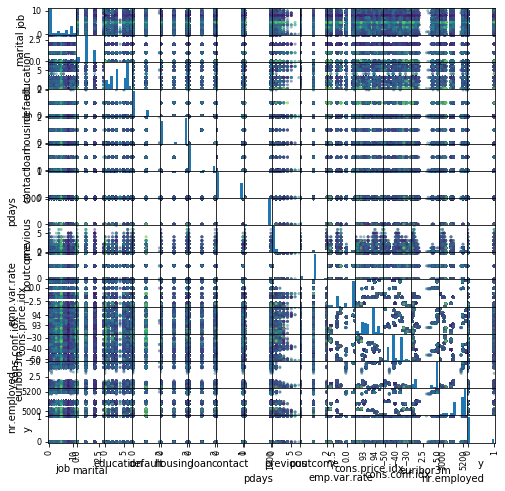

In [68]:
plotting.scatter_matrix(train.iloc[:, 1:], figsize=(8, 8), c=list(train.iloc[:, 0]), alpha=0.5)
plt.show()

In [69]:
dfs = train_x.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
28891,1.466329,-0.282796,0.584780,1.950084,0.942971,-0.451676,-0.760259,0.1953,-0.347967,0.191187,-1.200865,-0.867967,-1.428179,-1.281165,-0.941459
12804,0.076380,-0.282796,-0.817398,-0.512281,-1.086641,-0.451676,-0.760259,0.1953,-0.347967,0.191187,0.837475,0.588477,-0.476476,0.771338,0.843721
14503,-0.757590,-0.282796,-0.817398,-0.512281,-1.086641,-0.451676,1.315307,0.1953,-0.347967,0.191187,0.837475,0.588477,-0.476476,0.770761,0.843721
3991,-0.757590,-0.282796,-1.752184,1.950084,0.942971,-0.451676,1.315307,0.1953,-0.347967,0.191187,0.646380,0.719781,0.886189,0.711327,0.330309
18874,0.354370,-0.282796,1.052173,1.950084,0.942971,-0.451676,-0.760259,0.1953,-0.347967,0.191187,0.837475,-0.230449,0.951078,0.775954,0.843721


In [73]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [74]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1.907835,-0.802132,0.017138,-0.790314,-0.201923,-1.390988,1.719421,1.484746,-0.546084,-0.008112,1.629354,-0.046658,0.056695,-0.039981,-0.005242
1,-1.269141,-0.316400,0.191356,0.133727,-0.858055,0.358602,0.256883,0.418913,1.275698,0.031947,-1.066587,-0.342515,-0.018221,-0.031081,0.012782
2,-1.835587,-0.015211,0.893454,0.526994,-0.778809,0.892548,-0.404054,-0.268813,0.604620,0.725661,-0.191538,0.660953,0.060486,0.148254,-0.009933
3,-1.987440,0.229836,2.208107,-0.386017,0.113498,-0.638341,0.407988,-0.472964,-1.733464,-0.170460,-0.017658,0.002856,0.006622,0.071029,0.069681
4,-1.274220,-0.005456,-0.603032,-0.502055,0.143946,-1.519105,0.934478,0.013035,-0.593322,-1.952521,0.564862,-0.108400,0.021824,0.114147,-0.074325


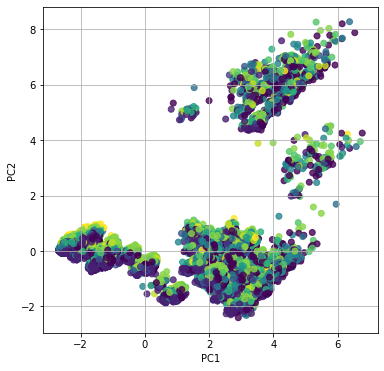

In [76]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(dfs.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [77]:
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.281399
PC2,0.109963
PC3,0.085949
PC4,0.072215
PC5,0.068510
PC6,0.066745
PC7,0.063995
PC8,0.061957
PC9,0.060889
PC10,0.055300
